# CS224W - Colab0 Extension

In this notebook, two commonly used packages, [NetworkX](https://networkx.org/documentation/stable/) and [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) are introduced. Most of the work is copied from [CS224W - Colab 0](https://colab.research.google.com/drive/16tqEHKOLUgYvXKx1V3blfYGpQb1_09MG?usp=sharing).

To organize my thoughts, I think that running the notebook and trying to share some related supplementary resources would be a good way to go. Moreover, I hope that this work will help someone interested in the topics like **Machine Learning on Graphs** or **Graph Representation Learning**. 



# NetworkX Fundamentals

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## Setup

In [3]:
# Import packages
import networkx as nx
import matplotlib.pyplot as plt   # Graph visualzation 

# Configuration
%matplotlib inline

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [4]:
def check_directed(is_directed):
    '''Return string indicating whether the graph is directed or not.
    
    Parameters:
        is_directed: boolean, if the graph is directed
    
    Return:
        dir_str: str, indicating whether the graph is directed or not
    '''
    dir_str = 'directed' if is_directed else 'undirected'
    return dir_str

In [5]:
# Create an undirected graph G (a "null graph")
G = nx.Graph()  
print(f"Instance of class \'Graph\' is {check_directed(G.is_directed())}")

# Create a directed graph H (a "null graph")
DG = nx.DiGraph()
print(f"Instance of class \'DiGraph\' is {check_directed(DG.is_directed())}")

# Create a multigraph MG (a "null graph")
MG = nx.MultiGraph()
print(f"Instance of class \'MultiGraph\' is {check_directed(MG.is_directed())}")

# Create a directed multigraph MDG (a "null graph")
MDG = nx.MultiDiGraph()
print(f"Instance of class \'MultiDiGraph\' is {check_directed(MDG.is_directed())}")

print(f"{'='*40}")

# Add graph level attribute (key/value pair)
G.graph["Name"] = "Bar"
print(f"Attibutes of graph G: {G.graph}")
G2 = nx.Graph(Name="BBQ")
print(f"Attibutes of graph G2: {G2.graph}")

Instance of class 'Graph' is undirected
Instance of class 'DiGraph' is directed
Instance of class 'MultiGraph' is undirected
Instance of class 'MultiDiGraph' is directed
Attibutes of graph G: {'Name': 'Bar'}
Attibutes of graph G2: {'Name': 'BBQ'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs in multilple ways, the choices are as follows:
1. Add one node at a time
2. Add nodes from any container (e.g., list, dict, or another predefined graph)

In [6]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0) 

# Add node features 
G.nodes[0]['time'] = '12pm'
G.nodes[0]['food'] = 'Cheese'

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print(f"Node 0 has attributes {node_0_attr}")

Node 0 has attributes {'feature': 5, 'label': 0, 'time': '12pm', 'food': 'Cheese'}


In [7]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])   # (node, attrdict)

# Get number of nodes
num_nodes = G.number_of_nodes()
print(f"Graph G has {num_nodes} nodes...\n")

# Loop through all the nodes
# Set data=True will return node attributes
print(f"Following are attributes of all nodes in graph G...")
for node, attrdict in G.nodes(data=True):
    print(f"Node {node} has attributes: {attrdict}")

Graph G has 3 nodes...

Following are attributes of all nodes in graph G...
Node 0 has attributes: {'feature': 5, 'label': 0, 'time': '12pm', 'food': 'Cheese'}
Node 1 has attributes: {'feature': 1, 'label': 1}
Node 2 has attributes: {'feature': 2, 'label': 2}


In [8]:
# Create a path graph of linearly connected nodes
PG = nx.path_graph([f'new_node{i}' for i in range(5)])  
print(f"Path graph PG has {PG.number_of_nodes()} nodes...\n")

# Add nodes from another predefined graph
print("Add nodes of path graph PG to graph G...")
G.add_nodes_from(PG)
print(f"Graph G has {G.number_of_nodes()} nodes after adding!\n")
print(f"Following are attributes of all nodes in graph G...")
for node, attrdict in G.nodes(data=True):
    print(f"Node {node} has attributes: {attrdict}")

Path graph PG has 5 nodes...

Add nodes of path graph PG to graph G...
Graph G has 8 nodes after adding!

Following are attributes of all nodes in graph G...
Node 0 has attributes: {'feature': 5, 'label': 0, 'time': '12pm', 'food': 'Cheese'}
Node 1 has attributes: {'feature': 1, 'label': 1}
Node 2 has attributes: {'feature': 2, 'label': 2}
Node new_node0 has attributes: {}
Node new_node1 has attributes: {}
Node new_node2 has attributes: {}
Node new_node3 has attributes: {}
Node new_node4 has attributes: {}


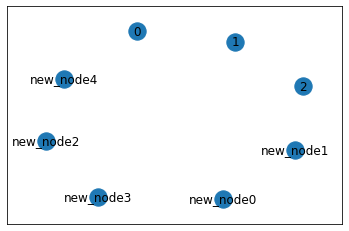

In [9]:
# Draw graph G
nx.draw_networkx(G)

ax = plt.gca()
ax.margins(0.15)
plt.show()

## Edge

Edges (with attributes) can also be easily added to NetworkX graphs in multiple ways, which are similar to the ones used for adding nodes above.

In [10]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)
G.add_edge(1, 2)

# Add edge features
G[0][1]['color'] = 'red'
G[1][2]['weight'] = 1.5

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print(f"Edge (0, 1) has attributes {edge_0_1_attr}")

# Get attributes of the edge (1, 2)
edge_1_2_attr = G.edges[(1, 2)]
print(f"Edge (1, 2) has attributes {edge_1_2_attr}")

Edge (0, 1) has attributes {'weight': 0.5, 'color': 'red'}
Edge (1, 2) has attributes {'weight': 1.5}


In [11]:
# Add multiple edges with edge attibutes
G.add_edges_from([
  (2, 0, {"weight": 0.3, "color": "yellow"}),
  ('new_node1', 'new_node2', {"weight": 0.1, "color": "blue"})
])

# Get number of edges
num_edges = G.number_of_edges()
print(f"Graph G has {num_edges} edges...\n")

# Loop through all the edges
# Set data=True will return edge attributes
print(f"Following is the information about edges in graph...")
for node1, node2, attrdict in G.edges(data=True):
    print(f"Edge ({node1}, {node2}) has attributes {attrdict}")

Graph G has 4 edges...

Following is the information about edges in graph...
Edge (0, 1) has attributes {'weight': 0.5, 'color': 'red'}
Edge (0, 2) has attributes {'weight': 0.3, 'color': 'yellow'}
Edge (1, 2) has attributes {'weight': 1.5}
Edge (new_node1, new_node2) has attributes {'weight': 0.1, 'color': 'blue'}


## Visualization 

Visualization of graph helps us understand what structure the graph looks like. For more detailed information about layout, please refer to [networkx.drawing.layout.spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout)

### Other graph visualization tools
* [pyvis](https://github.com/WestHealth/pyvis)
* [pygraphviz](https://github.com/pygraphviz/pygraphviz)

In [12]:
# Install pyvis
!pip install pyvis

In [13]:
# Import packages
from pyvis.network import Network

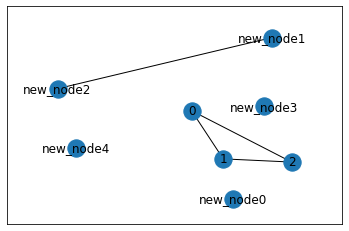

In [14]:
# Draw graph G using NetworkX
pos = nx.spring_layout(G, iterations=10)
nx.draw_networkx(G, pos=pos)

ax = plt.gca()
ax.margins(0.15)
plt.show()

In [15]:
# Draw graph G using pyvis
nt = Network('450px', '450px', notebook=True)
nt.from_nx(G)
nt.show(name="graph_G.html")

## Node Degree and Neighbor

Exploring node degree and neighbor can let us know the local structure around the specified node. 

In [16]:
# Degree of nodes in graph G
degrees = G.degree
print("Following are degrees of all nodes in graph...")
for node_id in G.nodes:
    print(f"Node {node_id} has degree {degrees[node_id]}")

# Get neighbor of node 0
node_id = 0
print(f"\nLocal structure of node {node_id}...")
for neighbor in G.neighbors(node_id):
    print(f"Node {node_id} has neighbor {neighbor}", end=', ')
    print(f"and edge between has weight {G.edges[node_id, neighbor]['weight']}.")

Following are degrees of all nodes in graph...
Node 0 has degree 2
Node 1 has degree 2
Node 2 has degree 2
Node new_node0 has degree 0
Node new_node1 has degree 1
Node new_node2 has degree 1
Node new_node3 has degree 0
Node new_node4 has degree 0

Local structure of node 0...
Node 0 has neighbor 1, and edge between has weight 0.5.
Node 0 has neighbor 2, and edge between has weight 0.3.


## Other Functionalities

NetworkX also provides plenty of useful methods to study graphs.

Here is an example to get [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) of nodes (see [CS224W: Machine Learning with Graphs | 2021 | Lecture 4.1 - PageRank](https://www.youtube.com/watch?v=TU0ankRcHmo&list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn&index=10) for more information!).

Following are page ranks of all nodes in graph...
{0: 0.17857162031103999, 1: 0.32142837968896, 2: 0.32142837968896, 3: 0.17857162031103999}


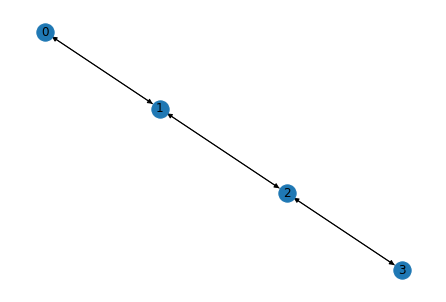

In [17]:
# Create a new path like graph and change it to a directed graph
num_nodes = 4
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels=True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
print("Following are page ranks of all nodes in graph...")
print(pr)

## Documentation

You can explore more NetworkX functions through its [documentation](https://networkx.org/documentation/stable/).

# PyTorch Geometric Fundamentals

PyTorch Geometric (PyG) is an extension library for PyTorch. It provides useful primitives to develop Graph Deep Learning models, including various graph neural network layers and a large number of benchmark datasets.

The introduction is adapted from https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI by [Matthias Fey](https://rusty1s.github.io/#/)

Aside from the basic manipulation, I also try to construct different model architectuires to see if they can outperform the baseline.

In [18]:
import torch
print(f"PyTorch has version {torch.__version__}")

PyTorch has version 1.9.0+cu111


## Installing dependencies

The installation of PyG on Colab can be a little bit tricky. Execute the cell below -- in case of issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html). 

_Note: This cell might take a while (up to ~10 minutes) to run_

In [19]:
# Install torch geometric
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

     |████████████████████████████████| 308 kB 4.2 MB/s 
     |████████████████████████████████| 407 kB 31.0 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 


## Utility function 

Following is the definition of the utility function used to help visualization.

In [20]:
# Utility function definition
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    '''Visualization function for NX graph or PyTorch tensor.

    Parameters:
        h: nx.Graph or torch.Tensor, graph or tensor object to plot 
        color: torch.Tensor, a sequence of colors with the same length as nodelist
            *Note: Because the numeric values are specified, nodes will be mapped
                   to colors using cmap.
        epoch: int, current epoch number 
        loss: float, loss value derived from loss criterion
        accuracy: float, 

    Return:
        None
    '''
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()   # Detach tensor from the specified device
        ax.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Introduction

Recently, deep learning on graphs has emerged to one of the hottest research fields in the deep learning community.
Here, **Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

## Objective - community detection

Use graph neural network to learn latent representations of nodes (*i.e.*, members) in the **Zachary's karate club network**, and try to assign each of them to the correct community (4 in total). 

## Dataset

PyTorch Geometric provides an easy access to the dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [21]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}')
print(f"{'='*10}Basic description{'='*10}")
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub()
==========Basic description==========
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first can inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [22]:
data = dataset.get(0)  # Get the first graph object (data object at index 0)

print(f"Data instance: {data}")
# Gather some statistics about the graph.
print(f"{'='*10}More properties{'='*10}")
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2* (data.num_edges/2)) / data.num_nodes:.2f}')   # Note that num_edges is divided by 2
                                                                                # to get the amount of 'unique' edges
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data instance: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
==========More properties==========
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [23]:
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

## Data

Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

### Remark
Notice that for **undirected** graphs, the edges will be specified in **bi-directional** manner. Hence, the amount of **unique** edges is actually $\frac{156}{2}$ = 78.

In [24]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


## Edge Index

Next we'll print the `edge_index` of our graph:

In [25]:
from IPython.display import Javascript   # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())   # Take transpose of the matrix

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We can see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

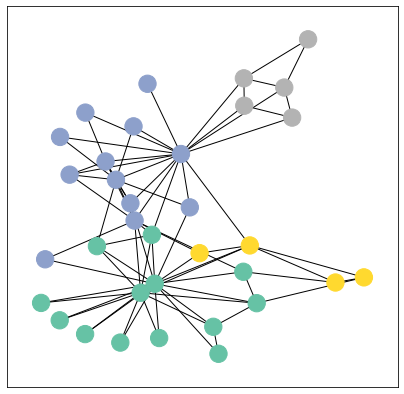

In [26]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Implementing Graph Neural Networks (GNNs)

After learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will start the journey by using one of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)), and different layers (e.g., **GraphSAGE layer**)will also be tried.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

### What is the output of a GNN?

The goal of a GNN is to take an input graph $G = (\mathcal{V}, \mathcal{E})$ where each node $v_i \in \mathcal{V}$ has an input feature vector $X_i^{(0)}$. What we want to learn is a function $f \to \mathcal{V} \times \mathcal{R}^d$, a function that takes in a node and its feature vector, as well as the graph structure, and outputs an _embedding_, a vector that represents that node in a way that's useful to our downstream task. Once we've mapped nodes and their initial features to their learned embeddings, we can use those embeddings to do a variety of different tasks including node-level, edge-level, or graph-level regression/classification.

In this colab, we want to learn embeddings that will be useful to classify each node into its community.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [27]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        embeddings = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(embeddings)

        return out, embeddings

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [71]:
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, dropout=0):
        super(GraphSAGE, self).__init__()
        torch.manual_seed(2021)
        self.conv1 = SAGEConv(dataset.num_features, 16)
        self.conv2 = SAGEConv(16, 8)
        self.dropout = torch.nn.Dropout(p=dropout)
        self.classifier = Linear(8, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        embeddings = h.relu()  # Final GNN embedding space
        embeddings = self.dropout(embeddings)

        # Apply a final (linear) classifier.
        out = self.classifier(embeddings)

        return out, embeddings

model = GraphSAGE(dropout=0.1)
print(model)

GraphSAGE(
  (conv1): SAGEConv(34, 16)
  (conv2): SAGEConv(16, 8)
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=8, out_features=4, bias=True)
)


### GCN

Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`.
We first define and stack **three graph convolution layers**. Each layer corresponds to aggregating information from each node's 1-hop neighborhood (its direct neighbors), but when we compose the layers together by stacking structure, we are able to aggregate information from each node's 3-hop neighborhood (all nodes up to 3 "hops" away).

In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

### GraphSAGE

Similar to GNN composed of **GCN layers**, in this model architecture, we first define and stack **two graphsage convolution layers**, which is shallower than `GCN` defined above. Each layer corresponds to aggregating information from each node's 1-hop neighborhood (its direct neighbors), but when we compose the layers together by stacking structure, we are able to aggregate information from each node's 2-hop neighborhood (all nodes up to 2 "hops" away).

In addition, the `SAGEConv` layers reduce the node feature dimensionality to $8$, *i.e.*, $34 \rightarrow 16 \rightarrow 8$. Each `SAGEConv` layer is enhanced by a [relu](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) non-linearity.

### Output
After graph convolution layers (either `GCNConv` or `SAGEConv`), we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.
We proceed to initialize our final model via `GCN()` and `GraphSAGE()`, and printing our model produces a summary of all their used sub-modules.

Embedding shape: [34, 2]
In other words, each node is represented by a two-dimensional vector.

Following is the visualization of node embeddings in two-dimensional embedding space...


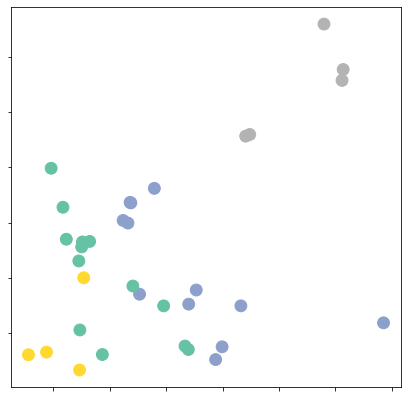

In [33]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')
print(f"In other words, each node is represented by a two-dimensional vector.")

print(f"\nFollowing is the visualization of node embeddings in two-dimensional embedding space...")
visualize(h, color=data.y)

Embedding shape: [34, 8]
In other words, each node is represented by a two-dimensional vector.

Following is the visualization of node embeddings in two-dimensional embedding space...


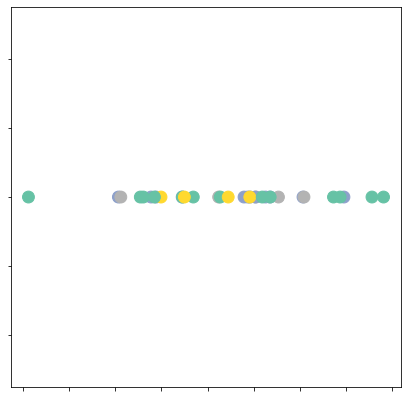

In [84]:
model = GraphSAGE()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')
print(f"In other words, each node is represented by a two-dimensional vector.")

print(f"\nFollowing is the visualization of node embeddings in two-dimensional embedding space...")
visualize(h, color=data.y)

Remarkably, even before training the weights of our model, the model produces an embedding of nodes that closely resembles the community-structure of the graph.
Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training so far!
This leads to the conclusion that GNNs introduce a [*strong inductive bias*](https://en.wikipedia.org/wiki/Inductive_bias), leading to similar embeddings for nodes that are close to each other in the input graph.

However, we can observe that the clustering effect in embedding space is somehow worse by using model architecture composed of `SAGEConv`. I will do more research and try to figure out the reason behind the scene in the future. 

### Training on the Karate Club Network

But can we do better? Let's look at an example on how to train our network parameters based on the knowledge of the community assignments of 4 nodes in the graph (one for each community):

Since everything in our model is differentiable and parameterized, we can add some labels, train the model and observe how the embeddings react.
Here, we make use of a semi-supervised or transductive learning procedure: We simply train against one node per class, but are allowed to make use of the complete input graph data.

Training our model is very similar to any other PyTorch model.
In addition to defining our network architecture, we define a loss critertion (here, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer (here, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are not new to PyTorch, this scheme should appear familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.
Here, this is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in the `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

In [80]:
# Specify model architecture to use
model_name = 'GraphSAGE'

<IPython.core.display.Javascript object>

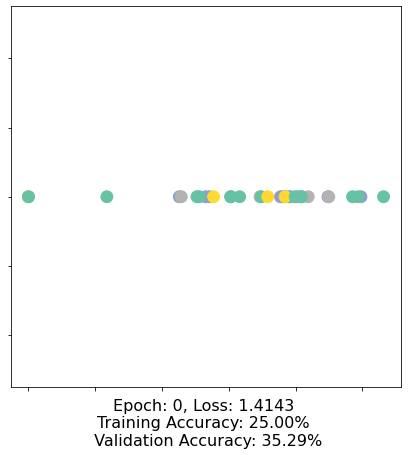

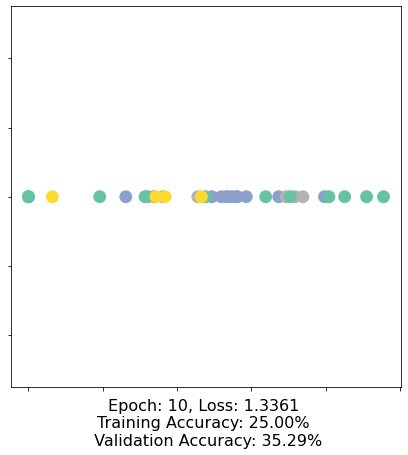

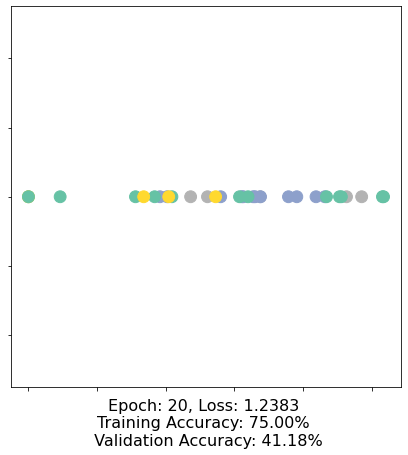

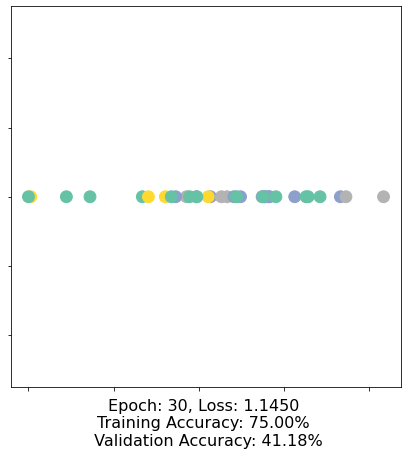

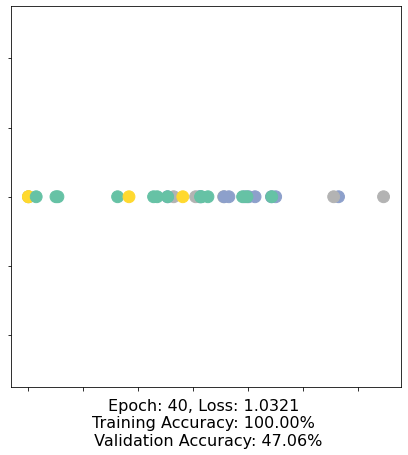

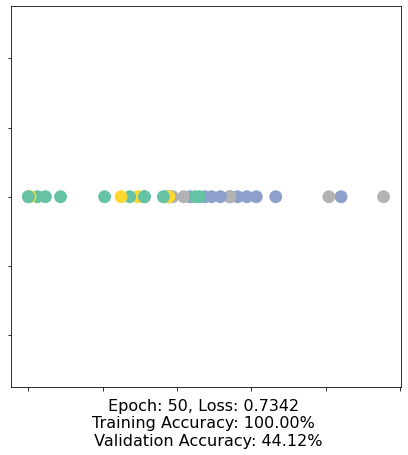

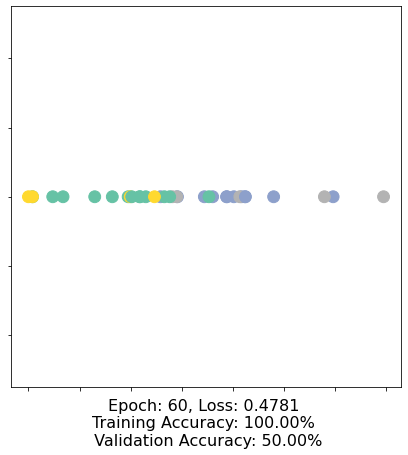

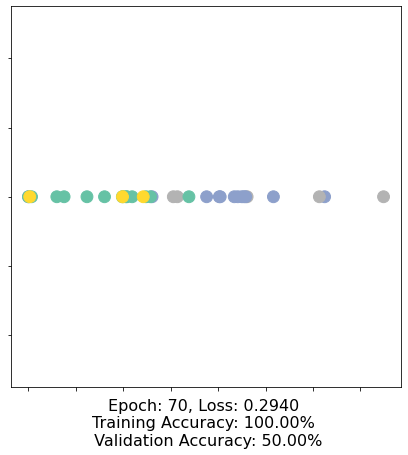

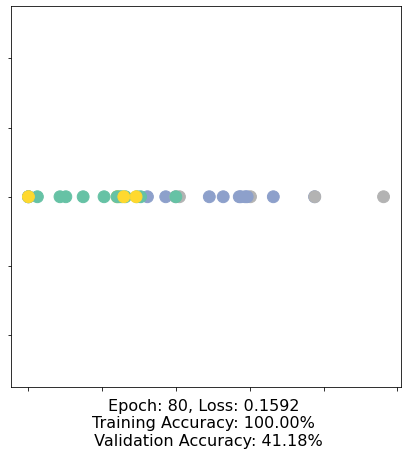

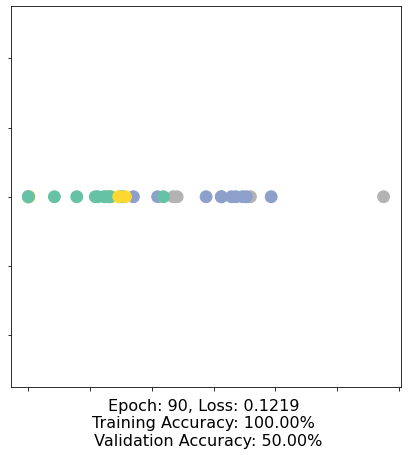

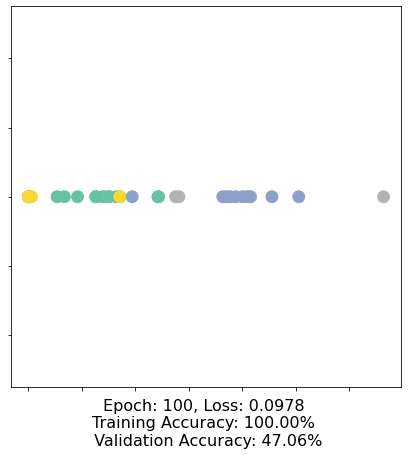

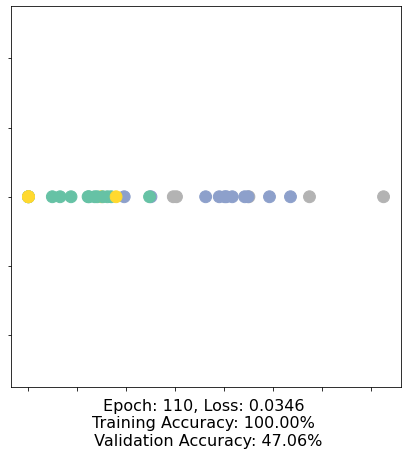

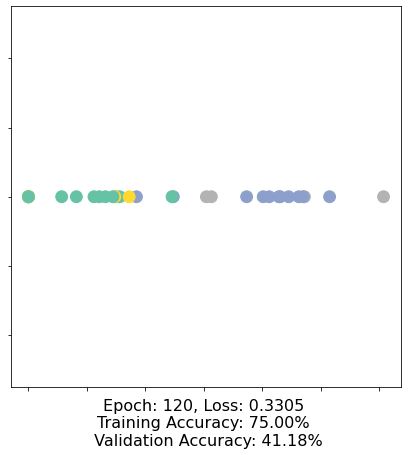

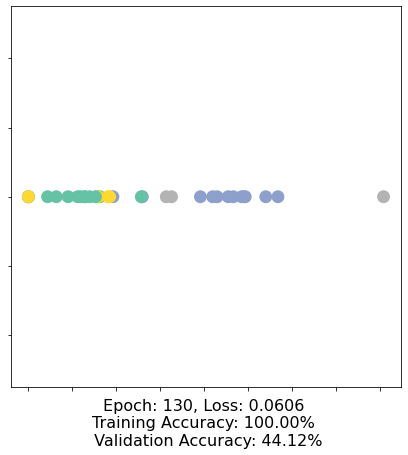

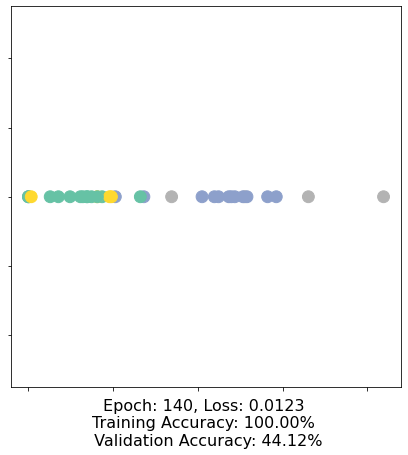

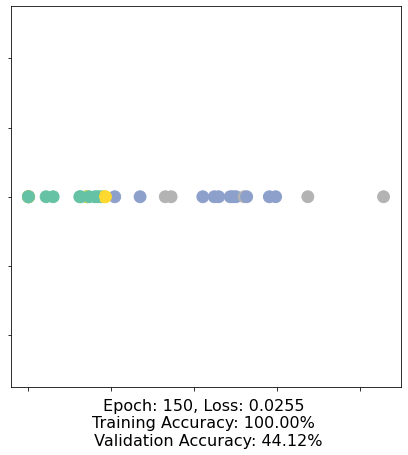

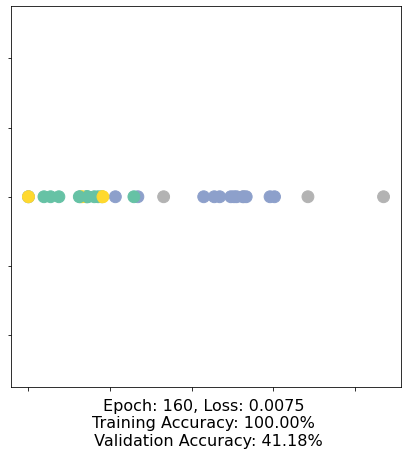

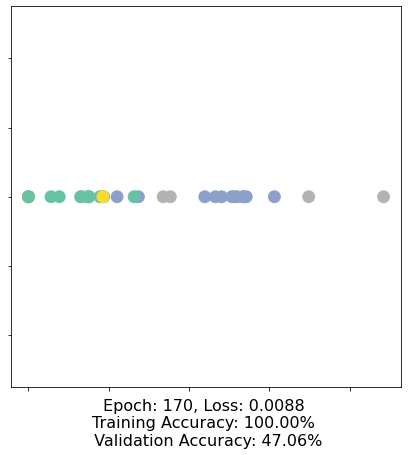

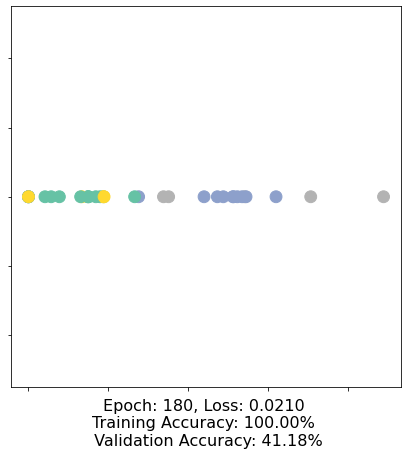

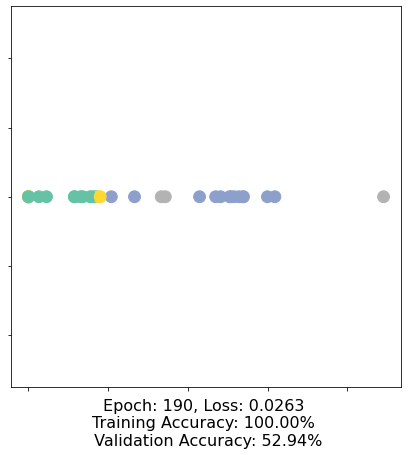

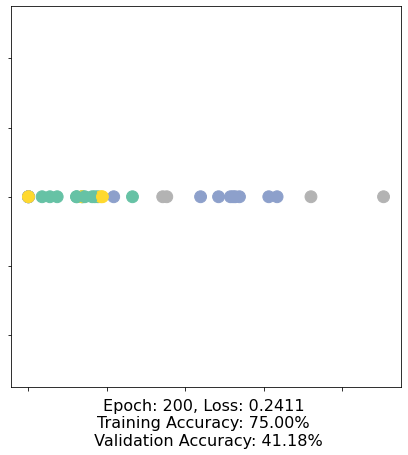

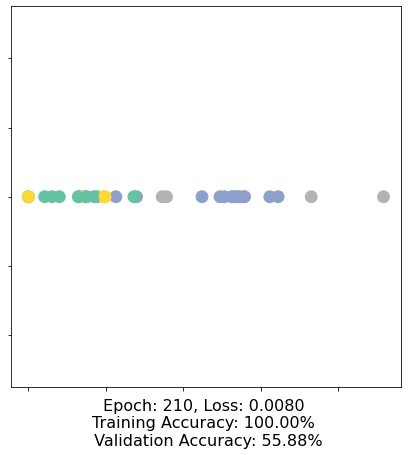

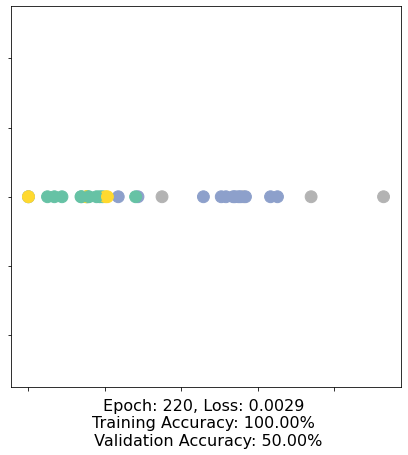

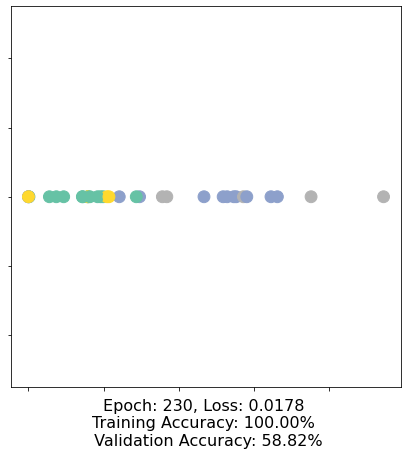

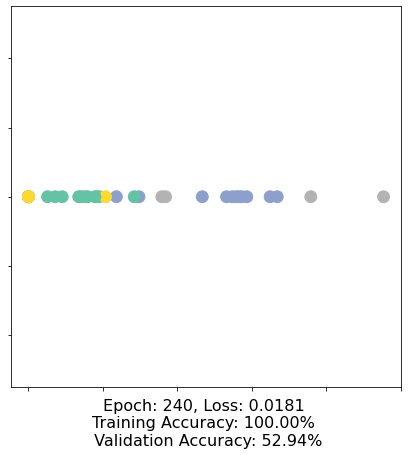

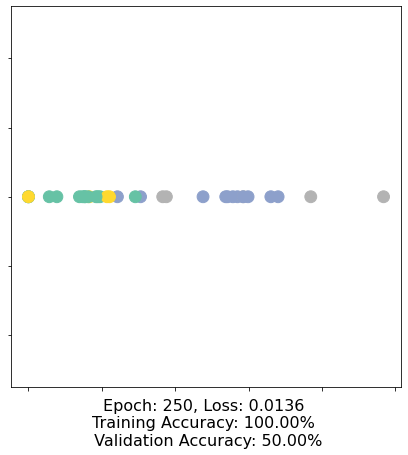

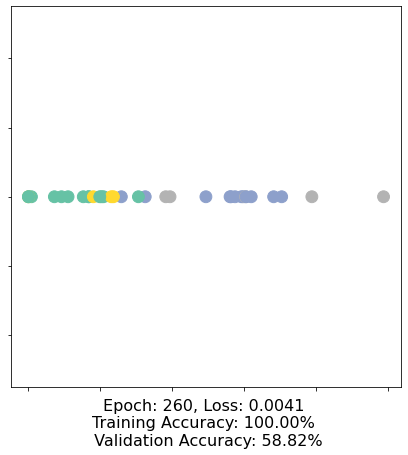

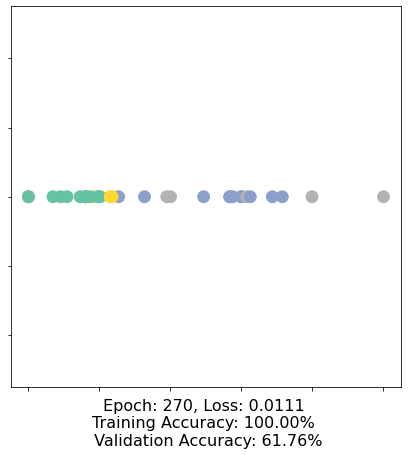

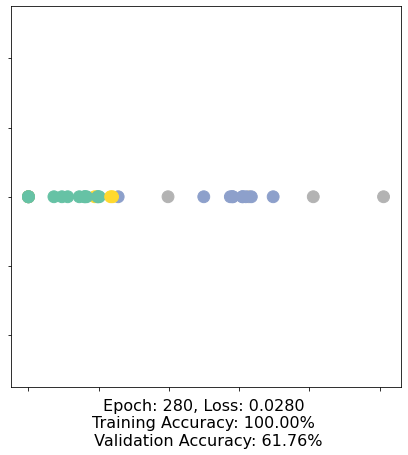

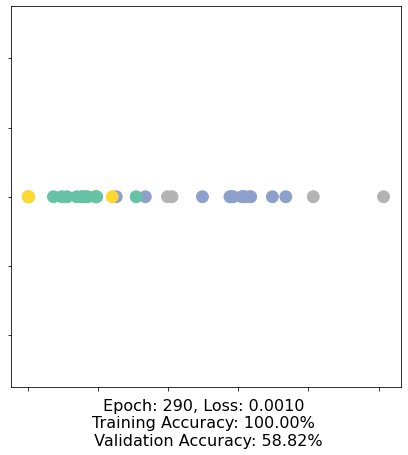

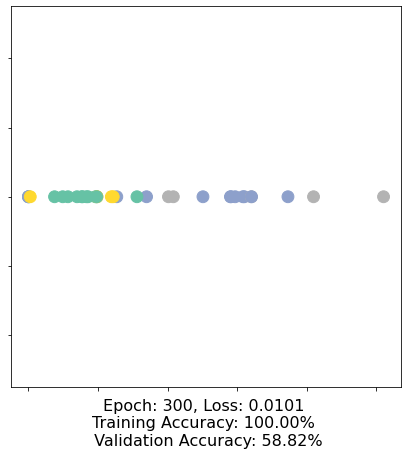

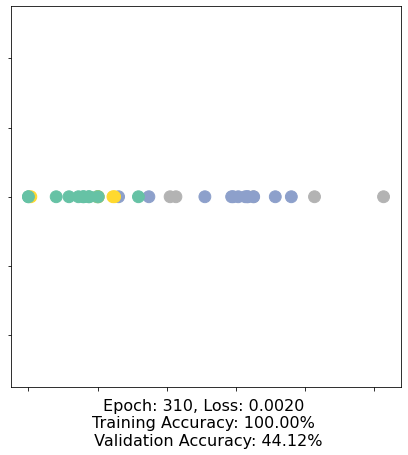

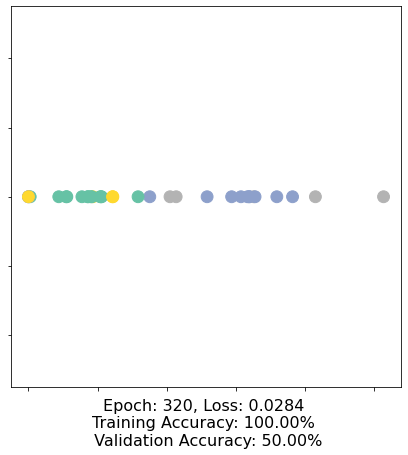

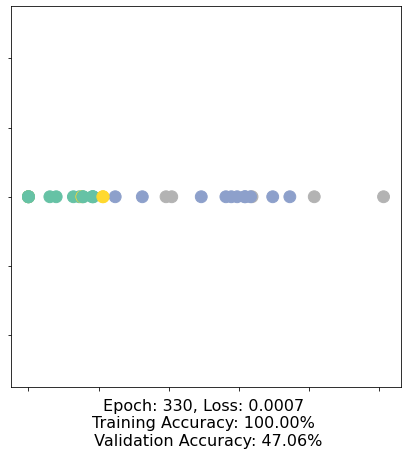

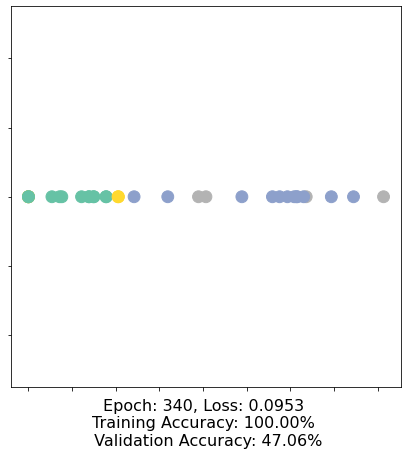

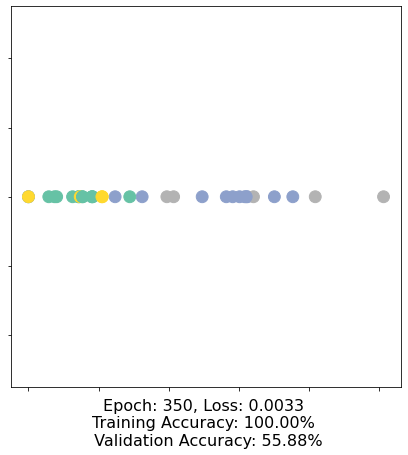

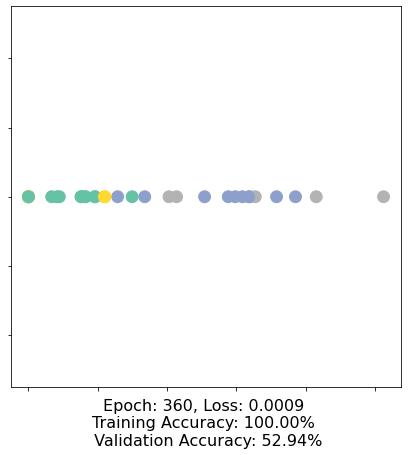

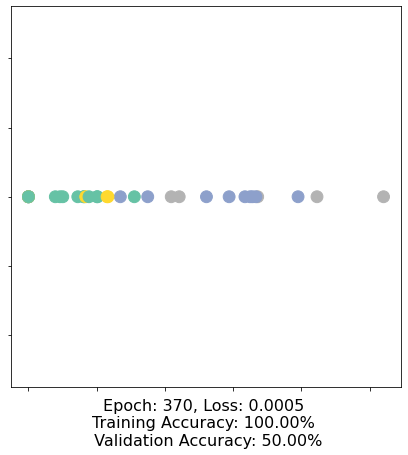

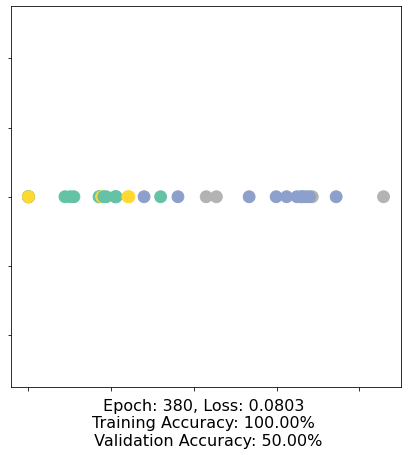

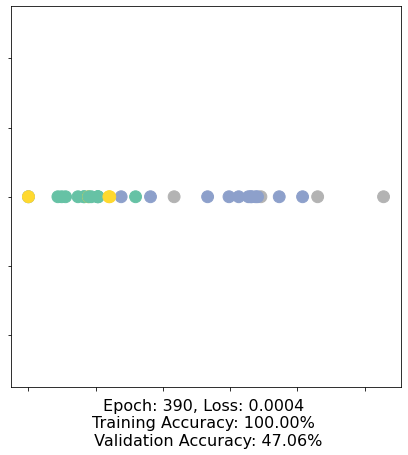

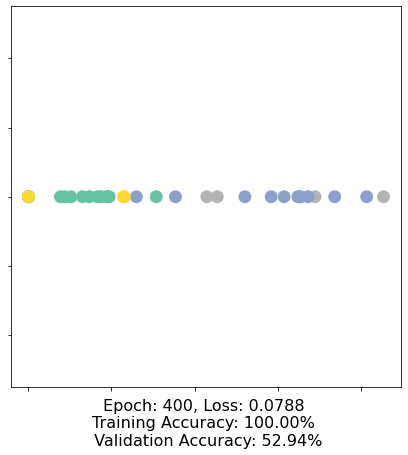

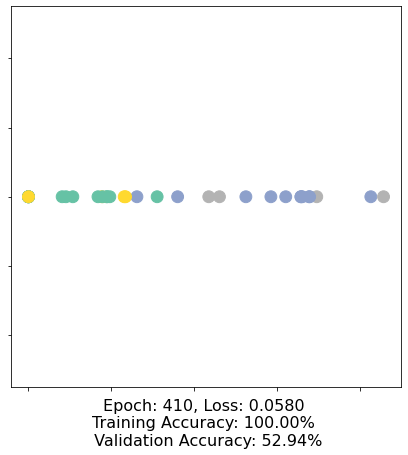

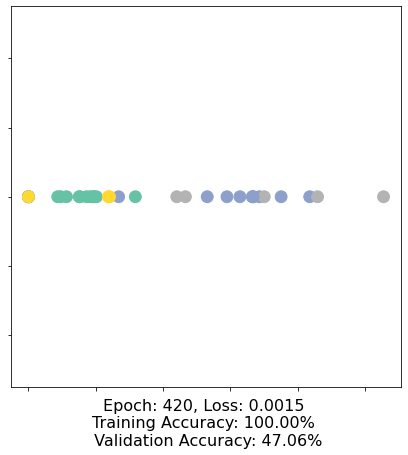

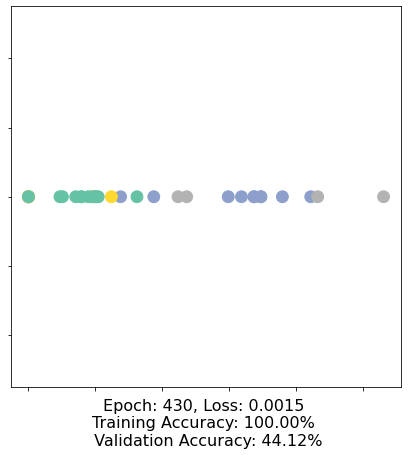

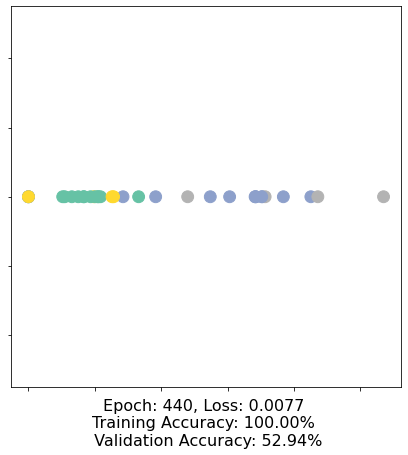

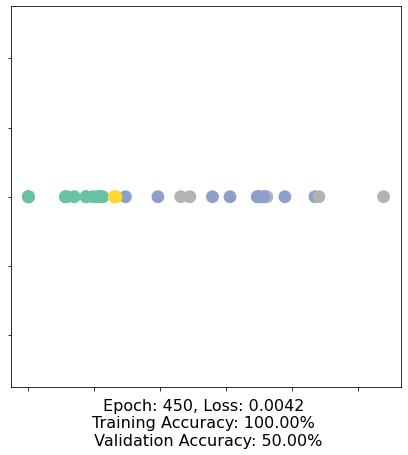

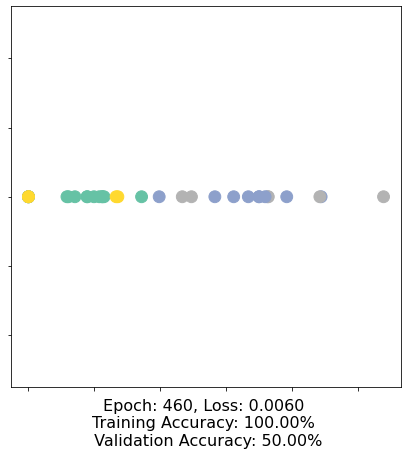

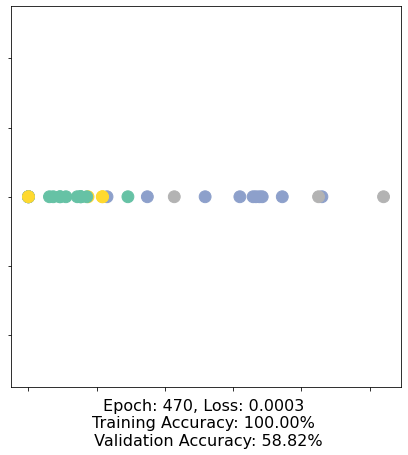

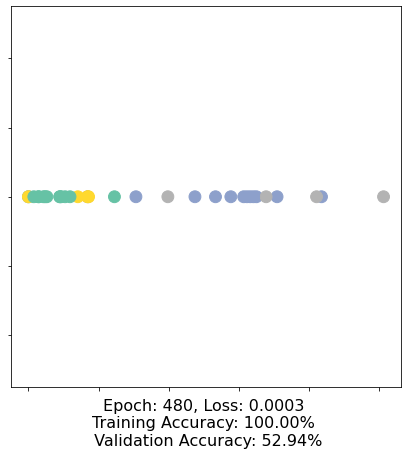

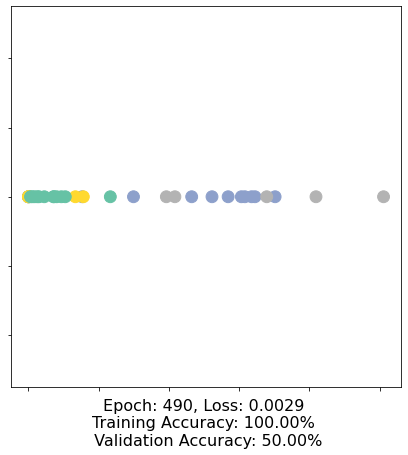

The best accuracy evaluated on validation set using model GraphSAGE: 0.6764705777168274


In [83]:
import time
from IPython.display import Javascript   # Restrict height of output cell
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN() if model_name == 'GCN' else GraphSAGE(dropout=0.1)   # Initialize customized model instance
criterion = torch.nn.CrossEntropyLoss()   # Define loss criterion
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)   # Define optimizer

def train(data):
    optimizer.zero_grad()   # Clear gradients
    out, h = model(data.x, data.edge_index)   # Perform a single forward pass
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  #  Compute the loss solely based on the training nodes
    loss.backward()   # Derive gradients
    optimizer.step()   # Update parameters based on gradients

    accuracy = {}
    # Calculate training accuracy on our four examples
    predicted_classes = torch.argmax(out[data.train_mask], axis=1)   # Return the index of the class with the largest value in each sample
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    
    # Calculate validation accuracy on the whole graph
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

best_val_acc = 10e-18
for epoch in range(500):
    loss, h, accuracy = train(data)

    # Record the best accuracy evaluated on validation set
    if accuracy['val'] > best_val_acc:
        best_val_acc = accuracy['val']

    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)

print(f"The best accuracy evaluated on validation set using model {model_name}: {best_val_acc}")

As one can see, our 3-layer `GCN` model and 2-layer `GraphSAGE` model manage to separate the communities pretty well and classify most of the nodes correctly.

To simply compare the performance of `GCN` and `GraphSAGE`, the best validation accuracy is also recorded. After doing some experiments and manual hyperparameter (e.g., learning rate) tunings, the best accuracy achieved by `GCN` is about 0.765, and that of `GraphSAGE` is about 0.676. I think we can achieve better performance by designing better model architectures or using other techniques to tune the hyperparameters. 

After learning more knowledge about machine learning on graphs, I'll try to improve the performance in the future and share with you all.

Last but not the least, thank CS224W for providing all the free online resources. And, I'm looking forward to diving deeper into the field of machine learning on graphs.


## Documentation



You can explore more PyG functions through its [documentation](https://pytorch-geometric.readthedocs.io/en/latest/).